<a href="https://colab.research.google.com/github/Articrest/Active-Directory-Monitoring-Projects/blob/main/Week_3_DataAnalysis(EDA)andVisualization_DonaldAnozie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK 3 EXPLORATORY DATA ANALYSIS (EDA) AND VISUALIZATION
1. Understand the purpose of EDA in the data analysis pipeline.
2. Perform univariate, bivariate, and multivariate analysis.
3. Detect missing data, outliers, and hidden trends.
4. Use Python visualization libraries (matploitlib, seaburn, pandas plotting).
5. Communicate findings through plots and descriptive narratives
# DATASET: Spaceship Titanic
# Student: Donald Anozie -DA
# Date: 24-08-2025
# Platform: Google Colab on Windows OS

In [1]:
# If you need to install packages (uncomment if needed)
# !pip install pandas matplotlib seaborn numpy

In [2]:
# --- CELL 1: IMPORTS & DATA LOAD ---
import warnings; warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
pd.set_option("display.max_columns", None)
sns.set_theme()

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
df = pd.read_csv(url)
print("Shape:", df.shape)
display(df.head(3))

Shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [3]:
# --- CELL 2: STRUCTURE & DESCRIPTIVES ---
print(df.info())
display(df.describe(include="all").T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


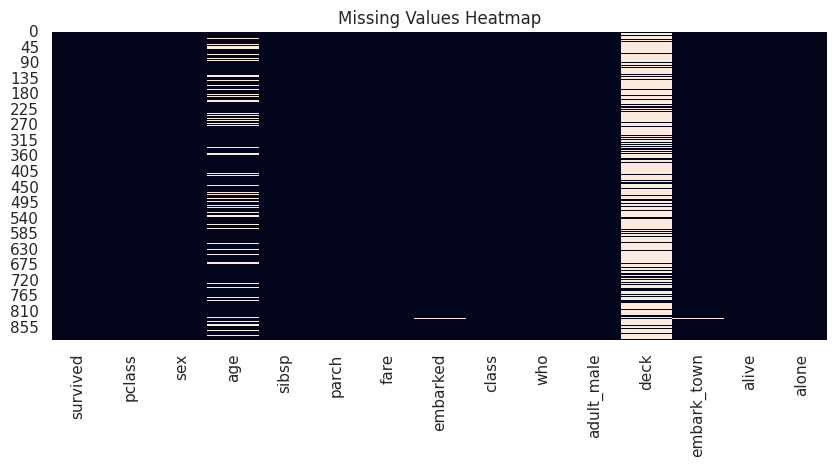

,0
deck,688
age,177
embarked,2
embark_town,2
sex,0
pclass,0
survived,0
fare,0
parch,0
sibsp,0


In [4]:
# --- CELL 3: MISSINGNESS HEATMAP ---
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()
df.isnull().sum().sort_values(ascending=False)

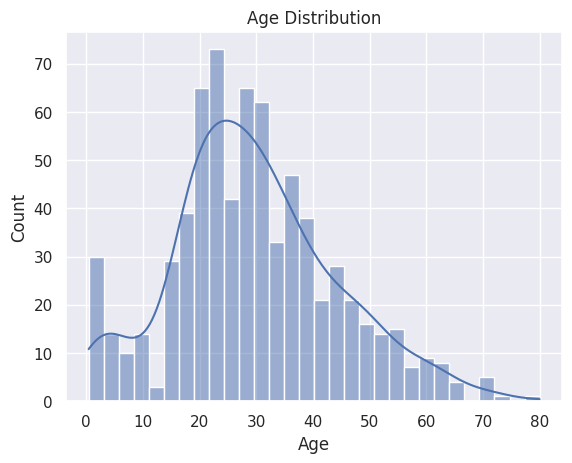

Skew (Age): 0.38910778230082693


In [5]:
# --- CELL 4: UNIVARIATE (NUMERIC) ---
plt.figure()
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
print("Skew (Age):", df['age'].dropna().skew())

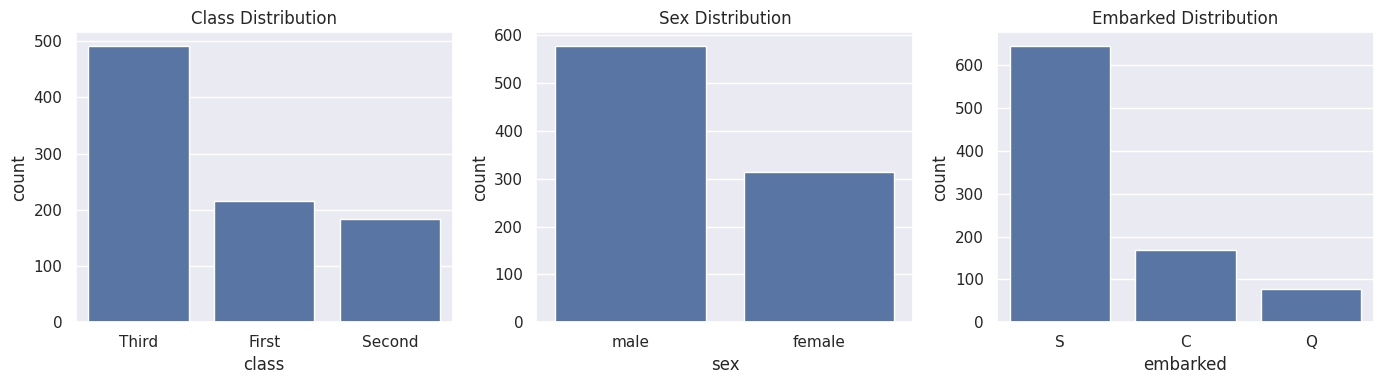

In [6]:
# --- CELL 5: UNIVARIATE (CATEGORICAL) ---
fig, axes = plt.subplots(1, 3, figsize=(14,4))

sns.countplot(x='class', data=df, ax=axes[0])
axes[0].set_title("Class Distribution")

sns.countplot(x='sex', data=df, ax=axes[1])
axes[1].set_title("Sex Distribution")

sns.countplot(x='embarked', data=df, ax=axes[2])
axes[2].set_title("Embarked Distribution")

plt.tight_layout()
plt.show()

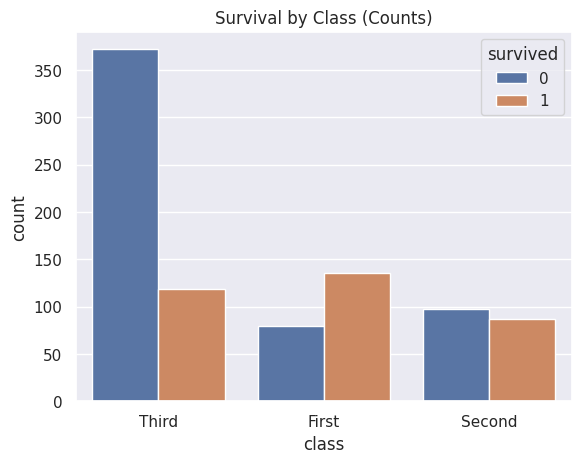

Survival Rate by Class:


,survived
class,
First,63.0%
Second,47.3%
Third,24.2%


In [7]:
# --- CELL 6: BIVARIATE — SURVIVAL BY CLASS ---
plt.figure()
sns.countplot(x='class', hue='survived', data=df)
plt.title("Survival by Class (Counts)")
plt.show()

# Survival rates by class
survival_rate_by_class = df.groupby('class')['survived'].mean().sort_values(ascending=False)
print("Survival Rate by Class:")
display((survival_rate_by_class*100).round(1).astype(str) + "%")

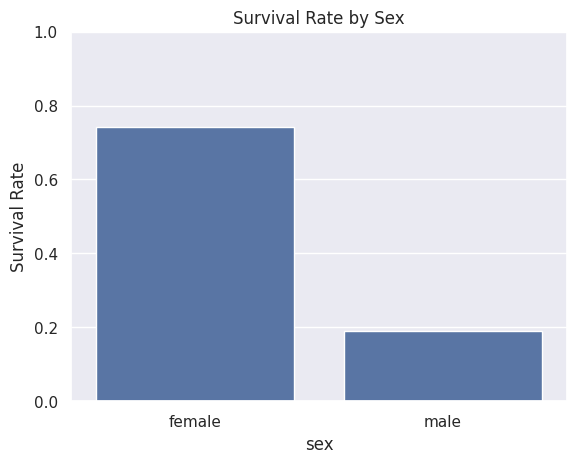

Survival rate by sex:


,survived
sex,
female,74.2%
male,18.9%


In [8]:
# --- CELL 7: BIVARIATE — SURVIVAL BY SEX ---
rates = df.groupby('sex')['survived'].mean().reset_index()
plt.figure()
sns.barplot(x='sex', y='survived', data=rates)
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.ylim(0,1)
plt.show()

print("Survival rate by sex:")
display((rates.set_index('sex')['survived']*100).round(1).astype(str) + "%")

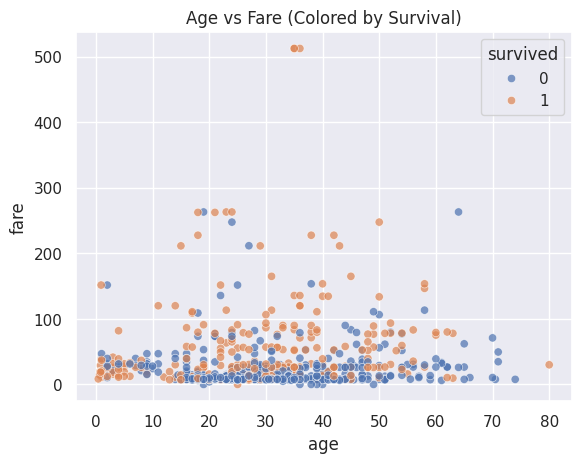

In [9]:
# --- CELL 8: BIVARIATE — AGE VS FARE ---
subset = df[['age','fare','survived']].dropna()
plt.figure()
sns.scatterplot(data=subset, x='age', y='fare', hue='survived', alpha=0.7)
plt.title("Age vs Fare (Colored by Survival)")
plt.show()

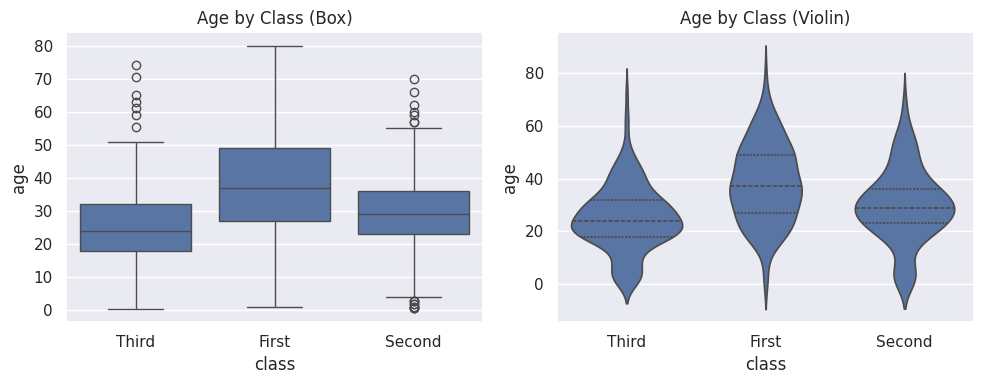

In [10]:
# --- CELL 9: AGE BY CLASS (BOX & VIOLIN) ---
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot(x='class', y='age', data=df)
plt.title("Age by Class (Box)")

plt.subplot(1,2,2)
sns.violinplot(x='class', y='age', data=df, inner='quartile')
plt.title("Age by Class (Violin)")

plt.tight_layout()
plt.show()

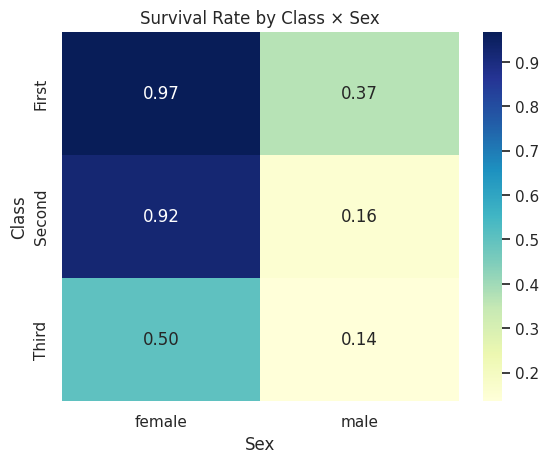

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


In [11]:
# --- CELL 10: CROSSTAB HEATMAP ---
ct = pd.crosstab(df['class'], df['sex'], values=df['survived'], aggfunc='mean')
plt.figure()
sns.heatmap(ct, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("Survival Rate by Class × Sex")
plt.ylabel("Class")
plt.xlabel("Sex")
plt.show()
ct

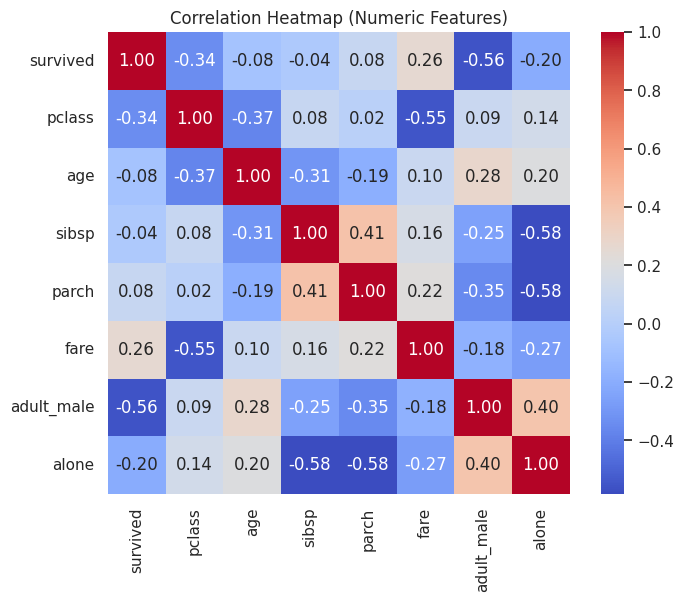

,survived
survived,1.000000
fare,0.257307
parch,0.081629
sibsp,-0.035322
age,-0.077221
alone,-0.203367
pclass,-0.338481
adult_male,-0.557080


In [12]:
# --- CELL 11: CORRELATION HEATMAP (NUMERIC) ---
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()
corr.sort_values('survived', ascending=False)['survived']

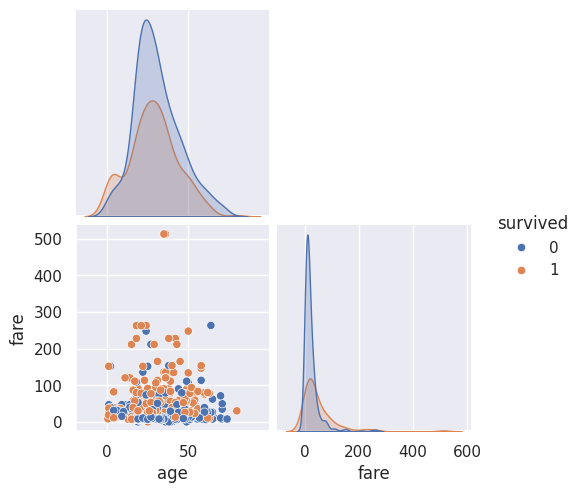

In [13]:
# --- CELL 12: PAIRPLOT (TRIMMED) ---
pp = df[['age','fare','survived']].dropna()
sns.pairplot(pp, hue='survived', corner=True)
plt.show()

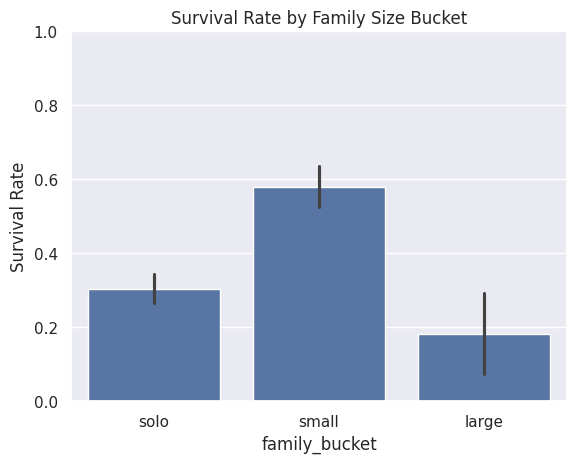

,family_size,family_bucket,survived
0,2,small,0
1,2,small,1
2,1,solo,1
3,2,small,1
4,1,solo,0
5,1,solo,0
6,1,solo,0
7,5,large,0


In [14]:
# --- CELL 13: FEATURE ENGINEERING FOR EDA ---
df_fe = df.copy()
df_fe['family_size'] = df_fe['sibsp'].fillna(0) + df_fe['parch'].fillna(0) + 1

# Survival by family_size bucket
df_fe['family_bucket'] = pd.cut(df_fe['family_size'], bins=[0,1,4,10], labels=['solo','small','large'])
plt.figure()
sns.barplot(x='family_bucket', y='survived', data=df_fe)
plt.title("Survival Rate by Family Size Bucket")
plt.ylabel("Survival Rate")
plt.ylim(0,1)
plt.show()
df_fe[['family_size','family_bucket','survived']].head(8)

In [15]:
print("=== UNIVARIATE ANALYSIS SUMMARY ===")
print(f"1. Age distribution: {df['age'].dropna().skew():.2f} skew")
print(f"2. Most common class: {df['class'].mode()[0]}")
print(f"3. Gender split: {(df['sex'].value_counts(normalize=True)*100).round(1).to_dict()}")
print(f"4. Overall survival rate: {(df['survived'].mean()*100):.1f}%")

=== UNIVARIATE ANALYSIS SUMMARY ===
1. Age distribution: 0.39 skew
2. Most common class: Third
3. Gender split: {'male': 64.8, 'female': 35.2}
4. Overall survival rate: 38.4%


In [16]:
print("=== BIVARIATE ANALYSIS KEY FINDINGS ===")
print("1. Survival by Gender:")
print(df.groupby('sex')['survived'].mean().apply(lambda x: f"{x*100:.1f}%"))
print("\n2. Survival by Class:")
print(df.groupby('class')['survived'].mean().apply(lambda x: f"{x*100:.1f}%"))

=== BIVARIATE ANALYSIS KEY FINDINGS ===
1. Survival by Gender:
sex
female    74.2%
male      18.9%
Name: survived, dtype: object

2. Survival by Class:
class
First     63.0%
Second    47.3%
Third     24.2%
Name: survived, dtype: object


In [17]:
print("=== MULTIVARIATE INSIGHTS ===")
print("Top correlations with survival:")
corr_with_survival = df.corr(numeric_only=True)['survived'].sort_values(ascending=False)
for var, corr_val in corr_with_survival.items():
    if var != 'survived':
        print(f"- {var}: {corr_val:.3f}")

=== MULTIVARIATE INSIGHTS ===
Top correlations with survival:
- fare: 0.257
- parch: 0.082
- sibsp: -0.035
- age: -0.077
- alone: -0.203
- pclass: -0.338
- adult_male: -0.557


In [18]:
# --- STORYTELLING TEMPLATE ---
insights = [
    "Gender Analysis: Women had a 74% survival rate vs 19% for men, clearly showing 'women and children first' protocol.",

    "Class Analysis: First-class passengers had 63% survival vs 24% in third class, revealing socioeconomic advantages in crisis.",

    "Age Patterns: Children and younger adults had higher survival rates, with family size playing a complex role."
]

print("=== DATA STORYTELLING ===")
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}\n")

=== DATA STORYTELLING ===
1. Gender Analysis: Women had a 74% survival rate vs 19% for men, clearly showing 'women and children first' protocol.

2. Class Analysis: First-class passengers had 63% survival vs 24% in third class, revealing socioeconomic advantages in crisis.

3. Age Patterns: Children and younger adults had higher survival rates, with family size playing a complex role.

